In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    r'C:\Users\Anirban Banerjee\Downloads\archive\dataset\train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical'
)

test_set = test_datagen.flow_from_directory(
    r'C:\Users\Anirban Banerjee\Downloads\archive\dataset\test',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical'
)

cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='softmax')
])

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, validation_data = test_set, epochs = 5)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.



Epoch 1/5


341/341 [==============================] - 113s 326ms/step - loss: 0.8275 - accuracy: 0.7007 - val_loss: 0.4213 - val_accuracy: 0.8580
Epoch 2/5
341/341 [==============================] - 117s 342ms/step - loss: 0.4608 - accuracy: 0.8341 - val_loss: 0.3377 - val_accuracy: 0.8844
Epoch 3/5
341/341 [==============================] - 126s 369ms/step - loss: 0.3809 - accuracy: 0.8618 - val_loss: 0.2733 - val_accuracy: 0.9047
Epoch 4/5
341/341 [==============================] - 107s 314ms/step - loss: 0.3378 - accuracy: 0.8759 - val_loss: 0.2067 - val_accuracy: 0.9251
Epoch 5/5
341/341 [==============================] - 97s 283ms/step - loss: 0.2966 - accuracy: 0.8915 - val_loss: 0.2506 - val_accuracy: 0.9055


In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

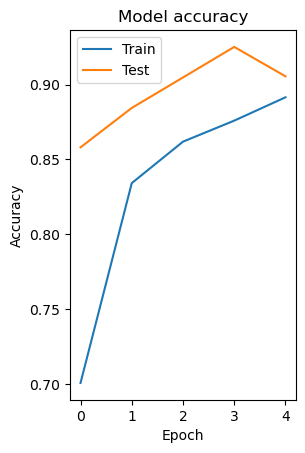

In [7]:
plt.subplot(1, 2, 1)
plt.plot(cnn.history.history['accuracy'])
plt.plot(cnn.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


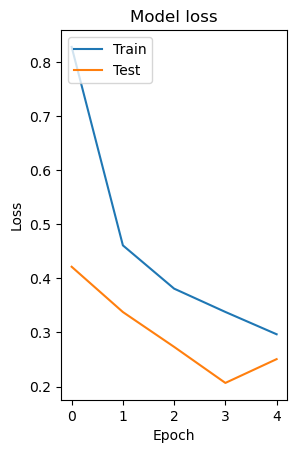

In [8]:
plt.subplot(1, 2, 2)
plt.plot(cnn.history.history['loss'])
plt.plot(cnn.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [9]:
import numpy as np
from keras.preprocessing import image

# Load an image for prediction
image_path = r'C:\Users\Anirban Banerjee\Downloads\archive\dataset\train\rottenapples\vertical_flip_Screen Shot 2018-06-08 at 2.50.22 PM.png'  # Replace 'path/to/your/image.jpg' with the actual path to your image
img = image.load_img(image_path, target_size=(64, 64))  # Load and resize the image
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image
img_array /= 255.0  # Normalize pixel values
# You can add additional preprocessing steps here if needed

# Make a prediction
prediction = cnn.predict(img_array)

# Convert the prediction probabilities to class labels
predicted_class = np.argmax(prediction)

# Map the predicted class index to the corresponding class label
class_labels = ['apple', 'banana', 'orange', 'rotten_apple', 'rotten_banana', 'rotten_orange']
predicted_label = class_labels[predicted_class]

print("Predicted class:", predicted_label)


1/1 [==============================] - 0s 293ms/step
Predicted class: rotten_apple


In [11]:
# Save the entire model to a HDF5 file
cnn.save('my_model.h5')

# Save just the model architecture to a JSON file
model_json = cnn.to_json()
with open('my_model.json', 'w') as json_file:
    json_file.write(model_json)

# Save just the model weights to a HDF5 file
cnn.save_weights('my_model_weights.h5')


C:\Users\Anirban Banerjee\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
